# Whisky Advocate
## *Insights from Reviews*

What makes a great whiskey? It is a smoky flavor? It is peaty? Is it something else?

There isn't a single truth of a great whisky, because tastes vary so much from person to person. However, we can analyze the reviews of experts to see if we can detect patterns in the flavor profiles of 'great' whiskys.

Today, you'll see the following things operationalized in python to study great whiskys:
* [Web Scraping](#web)
* [Data Exploration](#explore)
* [Machine Learning](#ml)
* [Data Visualization](#viz)


<a id="web"></a>
## Web Scraping
To gather our review data to understand great whiskeys, we will *scrape* [Whisky Advocate's](http://whiskeyadvocate.com) over 4,00 reviews. We will use python to access the reviews on the web and extract the relevant information from directly from the site's `html`.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
score_range = ['95-100', '90-94', '80-89', '70-79', '60-69']

In [3]:
url = "http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating={}&price=0&category=0&styles_id=0&issue_id=0"

In [4]:
urls = [url.format(score) for score in score_range]

In [5]:
tags = ['ratingValue', 'name', 'category', 'priceCurrency', 
 'price', 'description', 'author']

def get_review(review):
    data = {}
    for t in tags:
        data[t] = review.find(itemprop=t).text

    return data

def whiskey(urls):
    
    whiskey_reviews = list()
    
    for u in urls:
        r = requests.get(u)
        
        soup = BeautifulSoup(r.text, "lxml")
        ratings = soup.find(class_="ratings-grid-holder")
        
        ratings = ratings.find_all("article")
        
        reviews = [get_review(r) for r in ratings]
        
        whiskey_reviews += reviews
    
    return whiskey_reviews

In [6]:
data = whiskey(urls)

In [8]:
data[157]

{'author': 'John Hansell',
 'category': 'Single Malt Scotch',
 'description': '\nRummy molasses and toffee sweetness intertwine with roasted nuts and bright, juicy fruit. Suggestions of fig, lavender, leather, and tobacco throughout, with a hint of peat and polished oak on the finish. Not quite as refined as the Highland Park 18 year old, but it makes up for this with its dynamic personality. A delicious ultra-mature, sherry cask-aged whisky. (A Binny’s Beverage Depot exclusive.) \r\n',
 'name': 'Highland Park, 34 year old, 1971 vintage (Cask #8363), 53%',
 'price': '325.00',
 'priceCurrency': '$',
 'ratingValue': '94'}

<a id="explore"></a>
## Data Exploration

In [9]:
df = pd.DataFrame.from_records(data)

In [10]:
df.head()

,author,category,description,name,price,priceCurrency,ratingValue
0,Jonny McCormick,Blended Scotch Whisky,\nMagnificently powerful and intense. Caramels...,"Johnnie Walker Blue Label, 40%",225,$,97
1,John Hansell,Bourbon/Tennessee,\nA marriage of 13 and 18 year old bourbons. A...,"Four Roses 2013 Limited Edition Small Batch, 5...",85,$,97
2,Dave Broom,Single Malt Scotch,\nThere have been some legendary Bowmores from...,"Bowmore 46 year old (distilled 1964), 42.9%",13500.00,$,97
3,John Hansell,Bourbon/Tennessee,\nThis bottling celebrates master distiller Pa...,"Parker's Heritage Collection, 'Golden Annivers...",150.00,$,97
4,John Hansell,Single Malt Scotch,\nWhat impresses me most is how this whisky ev...,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",4500.00,$,97


In [11]:
df.shape[0]

4159

In [12]:
df['ratingValue'].astype('int').describe()

count    4159.000000
mean       86.333975
std         4.685930
min        60.000000
25%        83.000000
50%        87.000000
75%        90.000000
max        97.000000
Name: ratingValue, dtype: float64

In [13]:
df['category'].value_counts()

Single Malt Scotch                  1820
Bourbon/Tennessee                    499
Craft Whiskey                        333
Canadian                             222
Blended Scotch Whisky                211
Blended Malt Scotch Whisky           132
Rye Whiskey                          117
Irish                                107
Japanese                              84
Flavored Whisky & Liqueurs            62
Single Grain Whisky                   57
Australian Whisky                     40
Single Malt Swedish Whisky            39
Irish Blended Whiskey                 33
Indian Whisky                         32
Grain Scotch Whisky                   28
Single Malt English Whisky            27
Miscellaneous                         25
French Whisky                         24
Blended Irish Whiskey                 21
Taiwanese Whisky                      21
American Whiskey (Unspecified)        20
White Whiskey                         17
Irish Single Malt                     15
Irish Single Pot

In [15]:
df['price'].head()

0         225
1          85
2    13500.00
3      150.00
4     4500.00
Name: price, dtype: object

In [ ]:
df['p2'] = df['price'].astype('str').replace(",","").replace("$", "")

In [ ]:
df['p2'].astype('float').describe()

In [ ]:
df['p2'].str.replace("$", "").str.replace("/set","").astype('float')

In [16]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

NameError: name 'plt' is not defined

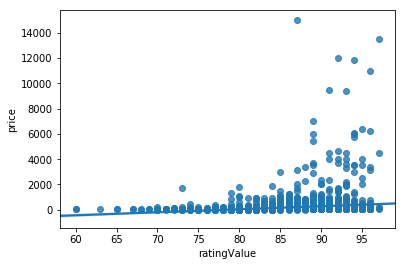

In [18]:
import seaborn as sns
from locale import atof

#df['price'] = df['price'].apply(atof)
sns.regplot(x=df[df['price'] < 20000]['ratingValue'].astype('float'), y=df[df['price'] < 20000]['price'])

Failed method for extracting %

In [ ]:
df['pert_alcohol'] = df['name'].apply(lambda x: x.split()[-1][:-1])

In [ ]:
df['pert_alcohol'] = pd.to_numeric(df['pert_alcohol'], errors='coerce')

In [21]:
def  is_it_perct(name):
    #print(name)
    last_seg = name.split()[-1]
    if last_seg[-1:] == "%":
        return last_seg[:-1]
    else:
        return None

In [ ]:
df.loc[df['name'].isnull(), 'name'] = 'Bunnahabhain'

In [22]:
df['pert_alcohol'] = df['name'].apply(is_it_perct)
df['pert_alcohol'] = pd.to_numeric(df['pert_alcohol'], errors='coerce')

In [23]:
df.head()

,author,category,description,name,price,priceCurrency,ratingValue,pert_alcohol
0,Jonny McCormick,Blended Scotch Whisky,\nMagnificently powerful and intense. Caramels...,"Johnnie Walker Blue Label, 40%",225.0,$,97,40.0
1,John Hansell,Bourbon/Tennessee,\nA marriage of 13 and 18 year old bourbons. A...,"Four Roses 2013 Limited Edition Small Batch, 5...",85.0,$,97,51.5
2,Dave Broom,Single Malt Scotch,\nThere have been some legendary Bowmores from...,"Bowmore 46 year old (distilled 1964), 42.9%",13500.0,$,97,42.9
3,John Hansell,Bourbon/Tennessee,\nThis bottling celebrates master distiller Pa...,"Parker's Heritage Collection, 'Golden Annivers...",150.0,$,97,50.0
4,John Hansell,Single Malt Scotch,\nWhat impresses me most is how this whisky ev...,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",4500.0,$,97,40.5


In [24]:
df['pert_alcohol'].describe()

count    4081.000000
mean       47.512557
std         6.465260
min        17.000000
25%        43.000000
50%        46.000000
75%        50.500000
max        98.600000
Name: pert_alcohol, dtype: float64

C:\ProgramData\Anaconda3\envs\mlg_2\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


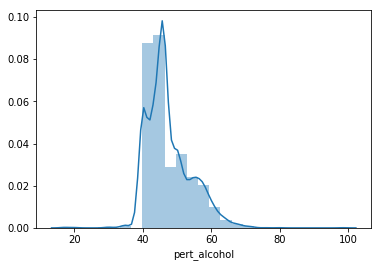

In [25]:
import seaborn as sns
sns.distplot(df[-df['pert_alcohol'].isnull()]['pert_alcohol'], bins=25)

In [ ]:
sns.distplot(df['ratingValue'].astype('float'), bins=10)

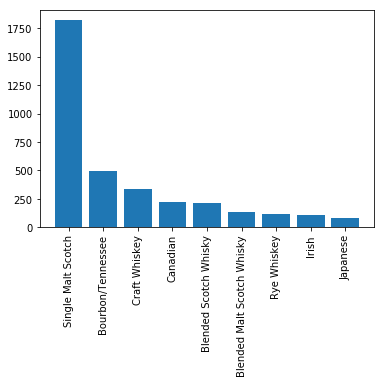

In [26]:
import numpy as np
import matplotlib.pyplot as plt

types = df['category'].value_counts()[:9]

height = types.tolist()
bars = types.index.tolist()
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation='vertical')

plt.show()

In [ ]:
list(df)

<a id="ml"></a>
## Machine Learning
* Can we use the words of the reviews to predict a whisky's review score? 
* Which words are the most important / indicate a good review? 

We'll be applying linear regression to help us answer these questions. To process the text, we'll be using a text vectorization method: Tf-idf (Term Frequency - Inverse Document Frequency).

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vect = TfidfVectorizer(stop_words='english', max_features=1000, 
                       min_df=5, max_df=.8, ngram_range=(1,2))
X = vect.fit_transform(df['description'])

In [30]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
vect.get_feature_names()[50:75]

['alcohol',
 'allowing',
 'allspice',
 'almond',
 'almonds',
 'alongside',
 'amber',
 'amber color',
 'american',
 'american oak',
 'anise',
 'aniseed',
 'antique',
 'appetizing',
 'apple',
 'apples',
 'apricot',
 'apricots',
 'ardbeg',
 'aroma',
 'aromas',
 'aromatic',
 'assertive',
 'available',
 'away']

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, df['ratingValue'].astype('float'))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X)
print(r2_score(df['ratingValue'].astype('float'), y_pred))

0.5767505314635144


In [34]:
model = pd.DataFrame(reg.coef_, columns=['coef'], index=vect.get_feature_names())

In [35]:
y = df['ratingValue'].astype('float').tolist()

In [36]:
from scipy import stats
params = np.append(reg.intercept_,reg.coef_)
predictions = y_pred
newX = pd.DataFrame({"Constant":np.ones(len(X.todense()))}).join(pd.DataFrame(X.todense()))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

In [37]:
model["Std Error"], model["t values"], model['p values'] = [sd_b[1:], ts_b[1:], p_values[1:]]

In [38]:
model.sort_values(by=['p values', 'coef'])

,coef,Std Error,t values,p values
vegetal,-14.446641,2.680000e+00,-5.390,0.000
bitterness,-10.474921,2.293000e+00,-4.567,0.000
emerging,-9.829332,2.488000e+00,-3.951,0.000
dominant,-9.586149,2.398000e+00,-3.998,0.000
faint,-9.239135,2.266000e+00,-4.076,0.000
youthful,-8.904375,1.867000e+00,-4.769,0.000
needs,-8.842870,2.139000e+00,-4.135,0.000
quickly,-8.508581,2.237000e+00,-3.804,0.000
short,-8.428824,2.184000e+00,-3.859,0.000
tastes,-8.021872,2.248000e+00,-3.569,0.000


<a id="viz"></a>
## Data Vizualization

We had a 1,000 features go into our regression model. We can only visualize a handful before the vizualization becomes overwhelming. We going to subset to only the features that are statistically signicant and then sample only 20 of those features. 

In [39]:
sample = model[model['p values'] <= 0.01].sample(20).sort_values(by='coef')
sample

,coef,Std Error,t values,p values
dominant,-9.586149,2.398,-3.998,0.000
youthful,-8.904375,1.867,-4.769,0.000
tingling,-8.652246,3.029,-2.857,0.004
place,-8.100875,2.829,-2.863,0.004
additional,-8.046192,2.616,-3.076,0.002
tastes,-8.021872,2.248,-3.569,0.000
label,-7.245969,2.143,-3.382,0.001
spanish,-7.125799,2.390,-2.982,0.003
neat,-5.660147,2.151,-2.631,0.009
hot,-4.623818,1.282,-3.606,0.000


### Regression Intercept
If reviewer wrote nothing in the review, then the whiskey's review score would be 86.3 based on our model. Each word in the review then adds or subtracts from the score based on coefficient associated with the term. 

Remeber here, that's it's not the count of the word's presence in the review. The value that you multiple the coefficient by is the tf-idf score of the term or phrase in that particular review. We'll cover tf-idf more comprohensively in the Apprentice Bootcamp class. 

In [41]:
print("Baseline whisky review score: {}".format(reg.intercept_))

Baseline whisky review score: 86.33397451310411


In [43]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool

output_notebook()

p = figure(x_range=sample.index.tolist(), plot_height=350, 
           title="Whiskey Review Words", tools='hover')
p.vbar(x=sample.index.tolist(), top=sample['coef'], width=0.8)
p.xaxis.major_label_orientation = "vertical"
hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Word',' @x'), ('Coef', ' @top')]
show(p)

Loading BokehJS ...